In [50]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

What happened in the data? (identify facts)
Why did it happen? (identify reasons behind the facts)
What will happen? (Ml, Forecasting, prediction)
How to make the best happen? (optimization)

In [3]:
df = pd.read_csv("Barca_accidents_opendata.csv")
df.head()

C:\Users\ESHAN\AppData\Local\Temp\ipykernel_15440\83649003.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Barca_accidents_opendata.csv")


,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,weekday_name,weekday,...,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,utm_coordinate_y,utm_coordinate_x,longitude,latitude
0,2015S005807,-1.0,Desconegut,-1.0,Desconegut,-1.0,Desconegut,Desconegut,Dimarts,Dm,...,No és causa del vianant,0.0,2.0,0.0,2.0,2.0,-1,-1,NaN,NaN
1,2015S007685,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,134801.0,Freser,0208 0208,Dimarts,Dm,...,Desobeir el senyal del semàfor,0.0,1.0,0.0,1.0,1.0,"4585420,58","431779,16",NaN,NaN
2,2015S001364,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,161407.0,Indústria,0336 0336,Dissabte,Ds,...,No és causa del vianant,0.0,1.0,0.0,1.0,1.0,"4585555,86","431913,65",NaN,NaN
3,2015S004325,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,226400.0,Las Navas de Tolosa,0343 0343,Divendres,Dv,...,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,"4585565,44","431946,45",NaN,NaN
4,2015S005540,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,95506.0,Conca,0032 0034,Divendres,Dv,...,No és causa del vianant,0.0,2.0,0.0,2.0,1.0,"4585260,16","431530,84",NaN,NaN


In [4]:
df.longitude.isnull().sum()

56310

In [5]:
df.shape

(110655, 27)

In [6]:
df.isnull().sum()

case_id                  0
district_id              1
district_name            1
neighborhood_id          1
neighborhood_name        1
street_code              1
street_name              2
postal_code           4804
weekday_name             0
weekday               7660
type_day              7660
year                     1
month                    1
month_name               1
day                      1
hour                     1
cyrcadian                0
cause_incident           1
n_deaths                 1
n_wounded_mild           1
n_wounded_severe         1
n_victims                1
n_vehicles               1
utm_coordinate_y         1
utm_coordinate_x         1
longitude            56310
latitude             56310
dtype: int64

In [7]:
df[df['district_id'].isnull()]

,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,weekday_name,weekday,...,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,utm_coordinate_y,utm_coordinate_x,longitude,latitude
10008,10/02/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.drop(10008, axis = 'rows')

In [9]:
df1 = df.drop(["postal_code", "latitude", "longitude", ], axis = 'columns')

UTM system(WGS84): Easting is utm_coordinate_x
Northing is utm_coordinate_y
zone is 31

In [10]:
#convert language

In [11]:
def uniquePortList(df, col):
    listt = []
    listt = df.loc[:,col].unique()
    return(listt.tolist())

In [12]:
from googletrans import Translator, constants
from pprint import pprint
# init the Google API translator
translator = Translator()

In [13]:
# translate a spanish text to english text (by default)
def convertLang(portList): 
    convList =[]
    translations = translator.translate(portList)
    for translation in translations:
        convList.append(translation.text)
    return convList

In [14]:
def conversion(df):
    col_name = ["weekday_name", "weekday", "type_day", "year", "month", "month_name", "day", "hour"
, "cyrcadian", "cause_incident", "type_day"]
    for n in range(len(col_name)):
        
        portList = []
        uniqueEngList = []
        
        curr_col = col_name[n]
        print(curr_col)
        portList = uniquePortList(df, curr_col)
        
        #convert
        uniqueEngList = convertLang(portList)
        
        for i in range(len(portList)):

            df.loc[df1[curr_col] == portList[i], curr_col] = uniqueEngList[i]
df2 = df1
conversion(df2)

weekday_name
weekday
type_day
year
month
month_name
day
hour
cyrcadian
cause_incident
type_day


In [15]:
df3= df2.copy()
df3.head()

,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,weekday_name,weekday,type_day,...,hour,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,utm_coordinate_y,utm_coordinate_x
0,2015S005807,-1.0,Desconegut,-1.0,Desconegut,-1.0,Desconegut,Tuesday,Dm,Labor,...,12.0,morning,It is not the cause of the pedestrian,0.0,2.0,0.0,2.0,2.0,-1,-1
1,2015S007685,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,134801.0,Freser,Tuesday,Dm,Labor,...,19.0,Afternoon,Disobey the traffic light signal,0.0,1.0,0.0,1.0,1.0,"4585420,58","431779,16"
2,2015S001364,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,161407.0,Indústria,Saturday,Ds,Labor,...,21.0,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,1.0,"4585555,86","431913,65"
3,2015S004325,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,226400.0,Las Navas de Tolosa,Friday,Dv,Labor,...,9.0,morning,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,2.0,"4585565,44","431946,45"
4,2015S005540,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,95506.0,Conca,Friday,Dv,Labor,...,20.0,Afternoon,It is not the cause of the pedestrian,0.0,2.0,0.0,2.0,1.0,"4585260,16","431530,84"


In [16]:
df3.cause_incident.unique()

array(['It is not the cause of the pedestrian',
       'Disobey the traffic light signal',
       'Cross over the pedestrian crossing', 'others',
       'Walk along the road', 'Disobey other signals', 'unknown'],
      dtype=object)

In [17]:
df3.weekday.unique()

array(['Dm', 'Ds', 'Dv', 'Dl', 'Dc', 'Dj', 'Dg', nan, '5', '1', '4', '2',
       '3', '7', '6'], dtype=object)

In [18]:
df3.type_day.unique()

array(['Labor', nan], dtype=object)

In [19]:
df3.weekday_name.unique()

array(['Tuesday', 'Saturday', 'Friday', 'Monday', 'Wednesday', 'Thursday',
       'sunday'], dtype=object)

In [20]:
df3 = df3.drop(df3[df3.weekday_name == '1'].index)

In [21]:
df3.weekday_name.unique()

array(['Tuesday', 'Saturday', 'Friday', 'Monday', 'Wednesday', 'Thursday',
       'sunday'], dtype=object)

In [22]:
df3[df3.weekday == 'Dm']

,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,weekday_name,weekday,type_day,...,hour,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,utm_coordinate_y,utm_coordinate_x
0,2015S005807,-1.0,Desconegut,-1.0,Desconegut,-1.0,Desconegut,Tuesday,Dm,Labor,...,12.0,morning,It is not the cause of the pedestrian,0.0,2.0,0.0,2.0,2.0,-1,-1
1,2015S007685,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,134801.0,Freser,Tuesday,Dm,Labor,...,19.0,Afternoon,Disobey the traffic light signal,0.0,1.0,0.0,1.0,1.0,"4585420,58","431779,16"
5,2015S002024,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,194406.0,Maragall,Tuesday,Dm,Labor,...,12.0,morning,Disobey the traffic light signal,0.0,1.0,0.0,1.0,1.0,"4585174,30","431648,74"
8,2015S005036,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,161407.0,Indústria,Tuesday,Dm,Labor,...,13.0,morning,It is not the cause of the pedestrian,0.0,3.0,0.0,3.0,2.0,"4584960,20","431281,06"
12,2015S000670,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,350308.0,València,Tuesday,Dm,Labor,...,20.0,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,1.0,"4584722,76","432000,63"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110649,2019S010045,1.0,Ciutat Vella,2,el Barri Gòtic,701266.0,Portal de la Pau ...,Tuesday,Dm,Labor,...,17.0,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,2.0,"4580981,67","431372,26"
110650,2019S010046,4.0,Les Corts,21,Pedralbes,101700.0,Doctor Ferran / Manila ...,Tuesday,Dm,Labor,...,15.0,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,1.0,"4582580,73","426884,52"
110651,2019S010047,10.0,Sant Martí,64,el Camp de l'Arpa del Clot,297001.0,Sant Antoni Maria Claret ...,Tuesday,Dm,Labor,...,19.0,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,2.0,"4585401,31","431576,15"
110652,2019S010048,2.0,Eixample,5,el Fort Pienc,28305.0,Ausiàs Marc / Nàpols ...,Tuesday,Dm,Labor,...,16.0,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,2.0,"4583086,37","431561,78"


In [23]:
df3[df3.weekday_name == 'Tuesday']

,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,weekday_name,weekday,type_day,...,hour,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,utm_coordinate_y,utm_coordinate_x
0,2015S005807,-1.0,Desconegut,-1.0,Desconegut,-1.0,Desconegut,Tuesday,Dm,Labor,...,12.0,morning,It is not the cause of the pedestrian,0.0,2.0,0.0,2.0,2.0,-1,-1
1,2015S007685,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,134801.0,Freser,Tuesday,Dm,Labor,...,19.0,Afternoon,Disobey the traffic light signal,0.0,1.0,0.0,1.0,1.0,"4585420,58","431779,16"
5,2015S002024,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,194406.0,Maragall,Tuesday,Dm,Labor,...,12.0,morning,Disobey the traffic light signal,0.0,1.0,0.0,1.0,1.0,"4585174,30","431648,74"
8,2015S005036,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,161407.0,Indústria,Tuesday,Dm,Labor,...,13.0,morning,It is not the cause of the pedestrian,0.0,3.0,0.0,3.0,2.0,"4584960,20","431281,06"
12,2015S000670,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,350308.0,València,Tuesday,Dm,Labor,...,20.0,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,1.0,"4584722,76","432000,63"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110649,2019S010045,1.0,Ciutat Vella,2,el Barri Gòtic,701266.0,Portal de la Pau ...,Tuesday,Dm,Labor,...,17.0,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,2.0,"4580981,67","431372,26"
110650,2019S010046,4.0,Les Corts,21,Pedralbes,101700.0,Doctor Ferran / Manila ...,Tuesday,Dm,Labor,...,15.0,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,1.0,"4582580,73","426884,52"
110651,2019S010047,10.0,Sant Martí,64,el Camp de l'Arpa del Clot,297001.0,Sant Antoni Maria Claret ...,Tuesday,Dm,Labor,...,19.0,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,2.0,"4585401,31","431576,15"
110652,2019S010048,2.0,Eixample,5,el Fort Pienc,28305.0,Ausiàs Marc / Nàpols ...,Tuesday,Dm,Labor,...,16.0,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,2.0,"4583086,37","431561,78"


In [24]:
df3.isnull().sum()

case_id                 0
district_id             0
district_name           0
neighborhood_id         0
neighborhood_name       0
street_code             0
street_name             1
weekday_name            0
weekday              7659
type_day             7659
year                    0
month                   0
month_name              0
day                     0
hour                    0
cyrcadian               0
cause_incident          0
n_deaths                0
n_wounded_mild          0
n_wounded_severe        0
n_victims               0
n_vehicles              0
utm_coordinate_y        0
utm_coordinate_x        0
dtype: int64

Monday is 1 and Dl
Tuesday is Dm
Wed is Dc
Thur is Dj
Dri is Dv
Sat is Ds

In [25]:
def replaceWeekday(df):
    keys = ['Dm', 'Ds', 'Dv', 'Dl', 'Dc', 'Dj', 'Dg']
    days = [2, 6, 5, 1, 3, 4, 7]
    day_name = ['Tuesday', 'Saturday', 'Friday', 'Monday', 'Wednesday', 'Thursday', 'sunday']
    for el in range(len(keys)):
        df.loc[df['weekday'] == keys[el], 'weekday'] = days[el] 
        df.loc[df['weekday_name'] == day_name[el], 'weekday'] = days[el]
        #print(keys[el])
    return df

In [26]:
df4 = replaceWeekday(df3)
df4.head()

,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,weekday_name,weekday,type_day,...,hour,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,utm_coordinate_y,utm_coordinate_x
0,2015S005807,-1.0,Desconegut,-1.0,Desconegut,-1.0,Desconegut,Tuesday,2,Labor,...,12.0,morning,It is not the cause of the pedestrian,0.0,2.0,0.0,2.0,2.0,-1,-1
1,2015S007685,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,134801.0,Freser,Tuesday,2,Labor,...,19.0,Afternoon,Disobey the traffic light signal,0.0,1.0,0.0,1.0,1.0,"4585420,58","431779,16"
2,2015S001364,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,161407.0,Indústria,Saturday,6,Labor,...,21.0,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,1.0,"4585555,86","431913,65"
3,2015S004325,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,226400.0,Las Navas de Tolosa,Friday,5,Labor,...,9.0,morning,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,2.0,"4585565,44","431946,45"
4,2015S005540,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,95506.0,Conca,Friday,5,Labor,...,20.0,Afternoon,It is not the cause of the pedestrian,0.0,2.0,0.0,2.0,1.0,"4585260,16","431530,84"


In [27]:
(df4['weekday'] == 'Ds')

0         False
1         False
2         False
3         False
4         False
          ...  
110650    False
110651    False
110652    False
110653    False
110654    False
Name: weekday, Length: 110654, dtype: bool

In [28]:
df4[df4.weekday_name == 'sunday']

,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,weekday_name,weekday,type_day,...,hour,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,utm_coordinate_y,utm_coordinate_x
17,2015S008823,10.0,Sant Martí,65.0,el Clot,115603.0,Espronceda,sunday,7,Labor,...,10.0,morning,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,2.0,"4585118,68","432760,33"
46,2015S008825,10.0,Sant Martí,73.0,la Verneda i la Pau,153205.0,Guipúscoa,sunday,7,Labor,...,17.0,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,2.0,"4586017,93","433561,94"
72,2015S005371,10.0,Sant Martí,71.0,Provençals del Poblenou,701414.0,C-31,sunday,7,Labor,...,1.0,Nit,others,0.0,2.0,0.0,2.0,2.0,"4585808,01","433936,57"
78,2015S000979,10.0,Sant Martí,69.0,Diagonal Mar i el Front Marítim del Poblenou,322608.0,Selva de Mar,sunday,7,Labor,...,19.0,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,2.0,"4584169,95","434429,56"
81,2015S003168,10.0,Sant Martí,69.0,Diagonal Mar i el Front Marítim del Poblenou,701265.0,Litoral (Besòs),sunday,7,Labor,...,22.0,Nit,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,2.0,"4584391,21","434814,70"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110616,2019S010012,10.0,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,701266.0,Litoral (Llobregat) ...,sunday,7,Labor,...,16.0,Afternoon,It is not the cause of the pedestrian,0.0,2.0,0.0,2.0,2.0,"4584049,58","434443,92"
110617,2019S010013,10.0,Sant Martí,71,Provençals del Poblenou,701414.0,Selva de Mar / Corts Catalanes ...,sunday,7,Labor,...,18.0,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,2.0,"4585249,15","433366,47"
110618,2019S010014,8.0,Nou Barris,44,Vilapicina i la Torre Llobeta,45701.0,Quinze ...,sunday,7,Labor,...,21.0,Afternoon,others,0.0,1.0,0.0,1.0,2.0,"4586808,85","431134,74"
110619,2019S010015,9.0,Sant Andreu,61,la Sagrera,201308.0,Martí Molins ...,sunday,7,Labor,...,23.0,Nit,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,1.0,"4586353,38","432278,77"


In [29]:
df4.isnull().sum()

case_id                 0
district_id             0
district_name           0
neighborhood_id         0
neighborhood_name       0
street_code             0
street_name             1
weekday_name            0
weekday                 0
type_day             7659
year                    0
month                   0
month_name              0
day                     0
hour                    0
cyrcadian               0
cause_incident          0
n_deaths                0
n_wounded_mild          0
n_wounded_severe        0
n_victims               0
n_vehicles              0
utm_coordinate_y        0
utm_coordinate_x        0
dtype: int64

#we have all weekday_name, we can use it to find weekdays(int) and type_day (sat and sunday are off)

In [30]:
df4.type_day.unique()

array(['Labor', nan], dtype=object)

In [31]:
def type_day_correction(df):
    df['working'] = df['weekday_name'].apply(lambda x: 0 if 'sunday' or 'Saturday' else 1)
    return df

LAter take into account other holidays

In [32]:
df5 = type_day_correction(df4)

In [33]:
df5.head()

,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,weekday_name,weekday,type_day,...,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,utm_coordinate_y,utm_coordinate_x,working
0,2015S005807,-1.0,Desconegut,-1.0,Desconegut,-1.0,Desconegut,Tuesday,2,Labor,...,morning,It is not the cause of the pedestrian,0.0,2.0,0.0,2.0,2.0,-1,-1,0
1,2015S007685,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,134801.0,Freser,Tuesday,2,Labor,...,Afternoon,Disobey the traffic light signal,0.0,1.0,0.0,1.0,1.0,"4585420,58","431779,16",0
2,2015S001364,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,161407.0,Indústria,Saturday,6,Labor,...,Afternoon,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,1.0,"4585555,86","431913,65",0
3,2015S004325,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,226400.0,Las Navas de Tolosa,Friday,5,Labor,...,morning,It is not the cause of the pedestrian,0.0,1.0,0.0,1.0,2.0,"4585565,44","431946,45",0
4,2015S005540,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,95506.0,Conca,Friday,5,Labor,...,Afternoon,It is not the cause of the pedestrian,0.0,2.0,0.0,2.0,1.0,"4585260,16","431530,84",0


In [34]:
df5.isnull().sum()

case_id                 0
district_id             0
district_name           0
neighborhood_id         0
neighborhood_name       0
street_code             0
street_name             1
weekday_name            0
weekday                 0
type_day             7659
year                    0
month                   0
month_name              0
day                     0
hour                    0
cyrcadian               0
cause_incident          0
n_deaths                0
n_wounded_mild          0
n_wounded_severe        0
n_victims               0
n_vehicles              0
utm_coordinate_y        0
utm_coordinate_x        0
working                 0
dtype: int64

In [35]:
df5 = df5.drop('type_day', axis='columns')

In [36]:
df5[df5['street_name'].isnull()]

,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,weekday_name,weekday,year,...,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,utm_coordinate_y,utm_coordinate_x,working
98326,2018S008677,5.0,Sarrià-Sant Gervasi,22,"Vallvidrera, el Tibidabo i les Planes",71406.0,NaN,Monday,1,2018.0,...,Nit,It is not the cause of the pedestrian,0.0,0.0,0.0,0.0,0.0,4585165.96,425082.72,0


In [37]:
df5 = df5.drop(98326, axis = 0)

In [38]:
df5.isnull().any()

case_id              False
district_id          False
district_name        False
neighborhood_id      False
neighborhood_name    False
street_code          False
street_name          False
weekday_name         False
weekday              False
year                 False
month                False
month_name           False
day                  False
hour                 False
cyrcadian            False
cause_incident       False
n_deaths             False
n_wounded_mild       False
n_wounded_severe     False
n_victims            False
n_vehicles           False
utm_coordinate_y     False
utm_coordinate_x     False
working              False
dtype: bool

DATA CLEANING COMPLETE

In [39]:
#EDA
#Feature selection
#one hot encoding - feature eng

In [ ]:
#check all data types are proper
df5['hour'].dtype

In [ ]:
df5['hour'] = df5['hour'].astype(float)
df5['hour'] = df5['hour'].astype(int)
df5['hour'].dtype
df5['hour'].unique()

In [102]:
df5.dtypes

case_id               object
district_id          float64
district_name         object
neighborhood_id       object
neighborhood_name     object
street_code          float64
street_name           object
weekday_name          object
weekday               object
year                  object
month                 object
month_name            object
day                   object
hour                   int32
cyrcadian             object
cause_incident        object
n_deaths             float64
n_wounded_mild       float64
n_wounded_severe     float64
n_victims            float64
n_vehicles           float64
utm_coordinate_y      object
utm_coordinate_x      object
working                int64
dtype: object

In [134]:
df5.day.unique()

array(['28.0', '13.0', '21.0', '5.0', '17.0', '20.0', '31.0', '30.0',
       '10.0', '27.0', '18.0', '22.0', '12.0', '23.0', '26.0', '6.0',
       '16.0', '3.0', '7.0', '14.0', '9.0', '15.0', '1.0', '4.0', '2.0',
       '29.0', '11.0', '19.0', '24.0', '8.0', '25.0'], dtype=object)

In [104]:
df5.cyrcadian.unique()

array(['morning', 'Afternoon', 'Nit'], dtype=object)

In [40]:
df5.cause_incident.unique()

array(['It is not the cause of the pedestrian',
       'Disobey the traffic light signal',
       'Cross over the pedestrian crossing', 'others',
       'Walk along the road', 'Disobey other signals', 'unknown'],
      dtype=object)

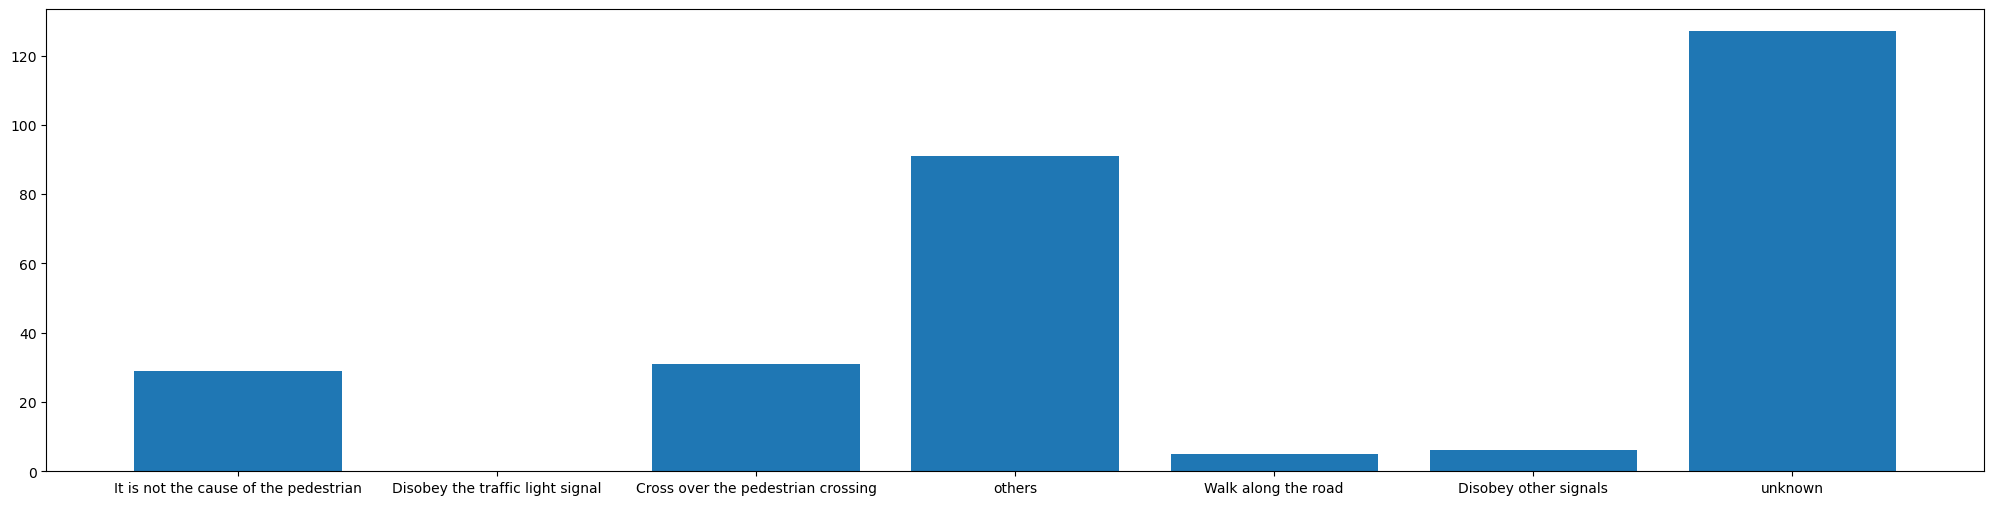

In [119]:
group_deaths = df5.groupby('cause_incident')['n_deaths'].sum()
plt.figure(figsize=(25,6))
plt.bar(df5['cause_incident'].unique(), group_deaths)
plt.show()

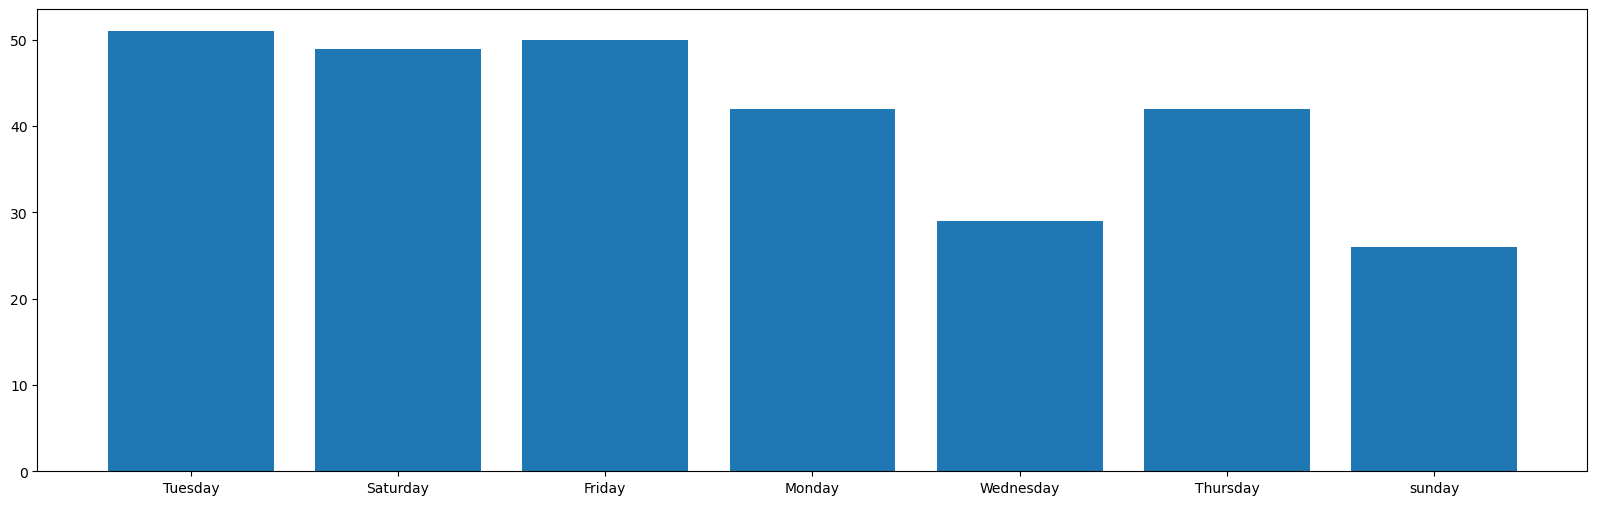

In [118]:
plt.figure(figsize=(20,6))
grouped_name = df5.groupby('weekday_name')['n_deaths'].sum()
plt.bar(df5['weekday_name'].unique(), grouped_name)
plt.show()

In [120]:
df5.hour.unique()

array([12, 19, 21,  9, 20, 18, 13, 16, 10,  7, 15,  8, 14, 17, 23, 22,  6,
        1, 11,  4,  5,  0,  3,  2])

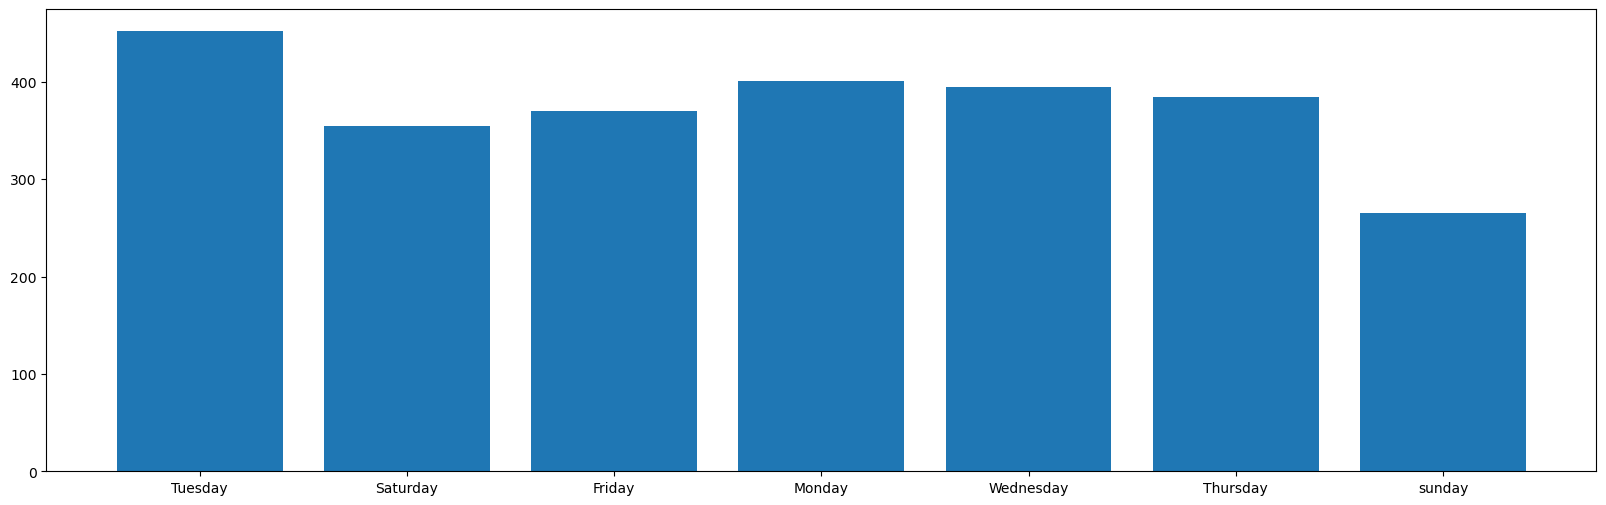

In [117]:
plt.figure(figsize=(20,6))
grouped_wounded = df5.groupby('weekday_name')['n_wounded_severe'].sum()
plt.bar(df5['weekday_name'].unique(), grouped_wounded)
plt.show()

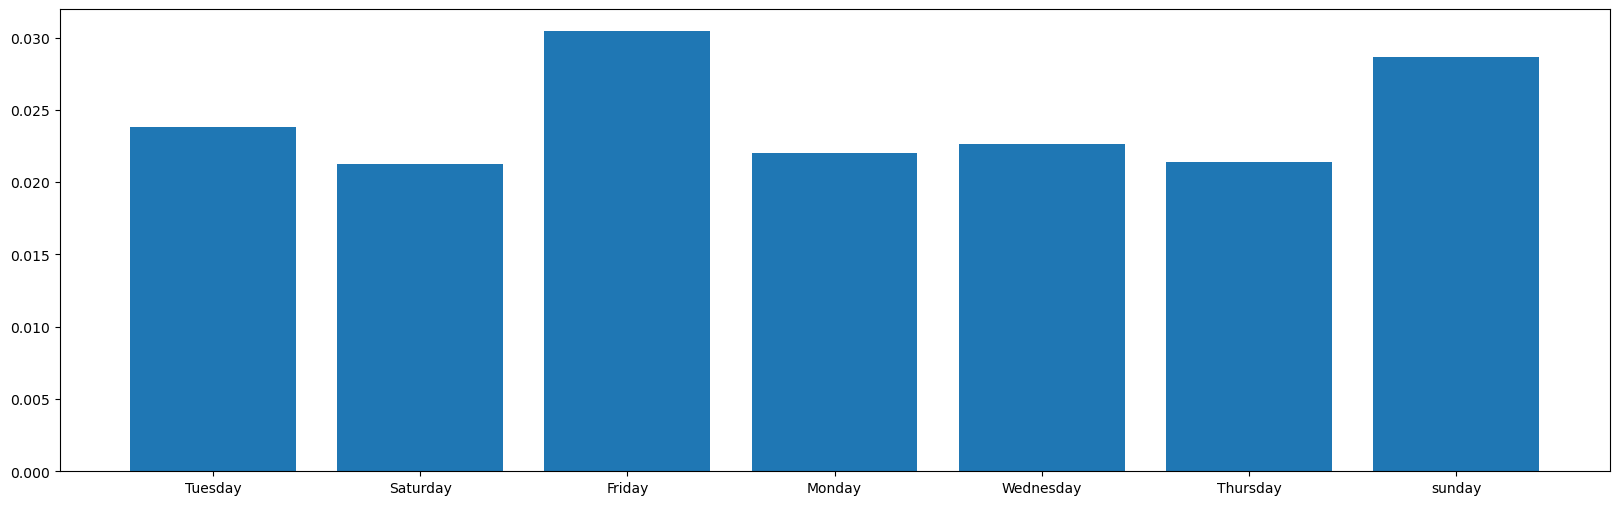

In [116]:
#ax = df5.cause_incident.hist()
plt.figure(figsize=(20,6))
grouped_wounded = df5.groupby('weekday_name')['n_wounded_severe'].mean()
plt.bar(df5['weekday_name'].unique(), grouped_wounded)
plt.show()

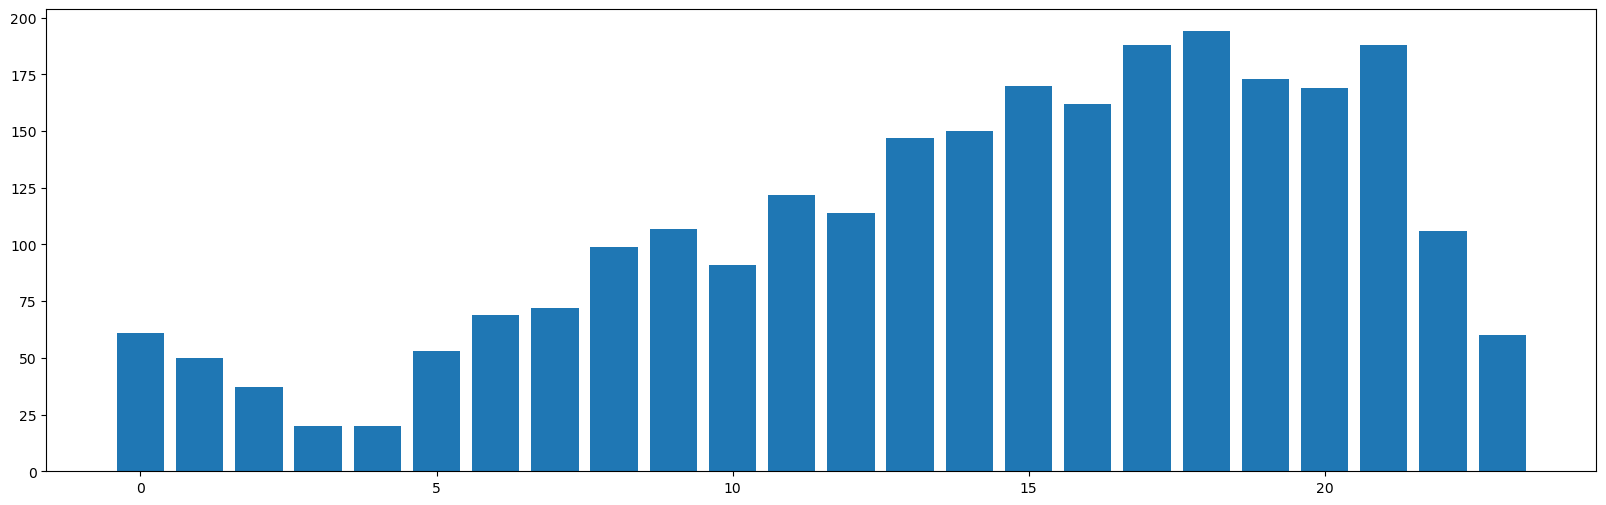

In [115]:
plt.figure(figsize=(20,6))
grouped_wounded = df5.groupby('hour')['n_wounded_severe'].sum()
plt.bar(sorted(df5['hour'].unique()), grouped_wounded)
plt.show()

This shows that majority of accidents with wounded victims happen between 1500 hrs to 2100 hrs

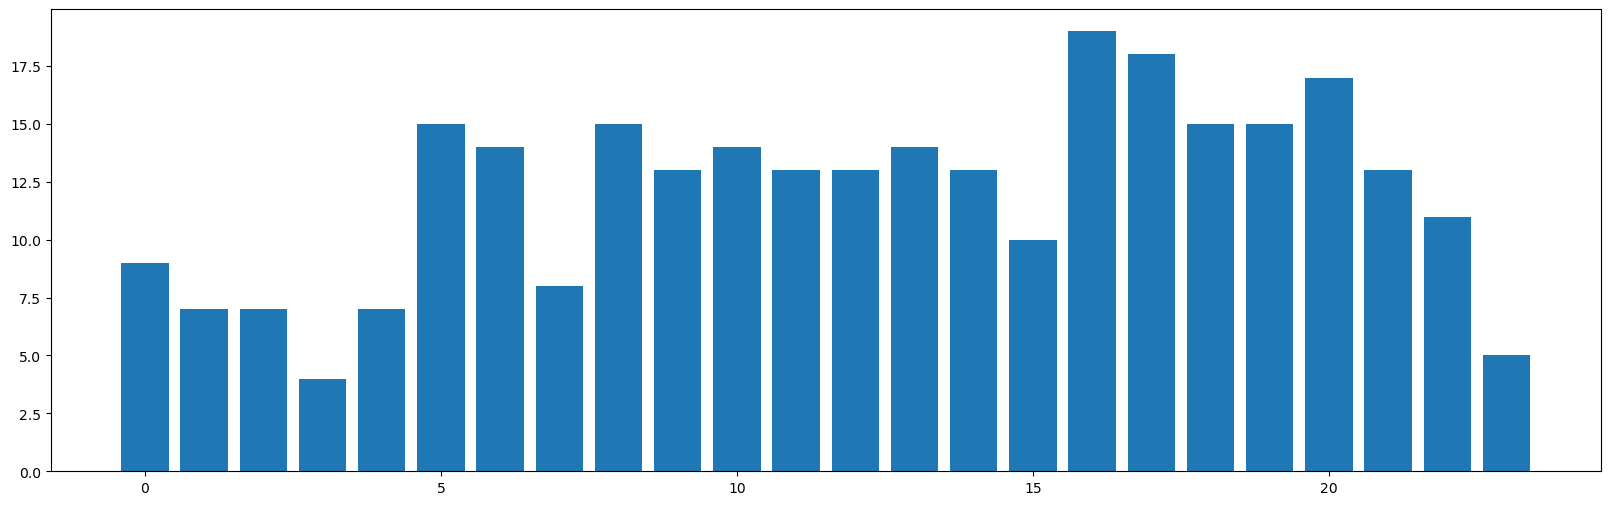

In [114]:
plt.figure(figsize=(20,6))
grouped_wounded = df5.groupby('hour')['n_deaths'].sum()
plt.bar(sorted(df5['hour'].unique()), grouped_wounded)
plt.show()

But the story of deaths does not follow this trend, while 1600 hrs & 1700 hrs have highest no of deaths 

<function matplotlib.pyplot.show(close=None, block=None)>

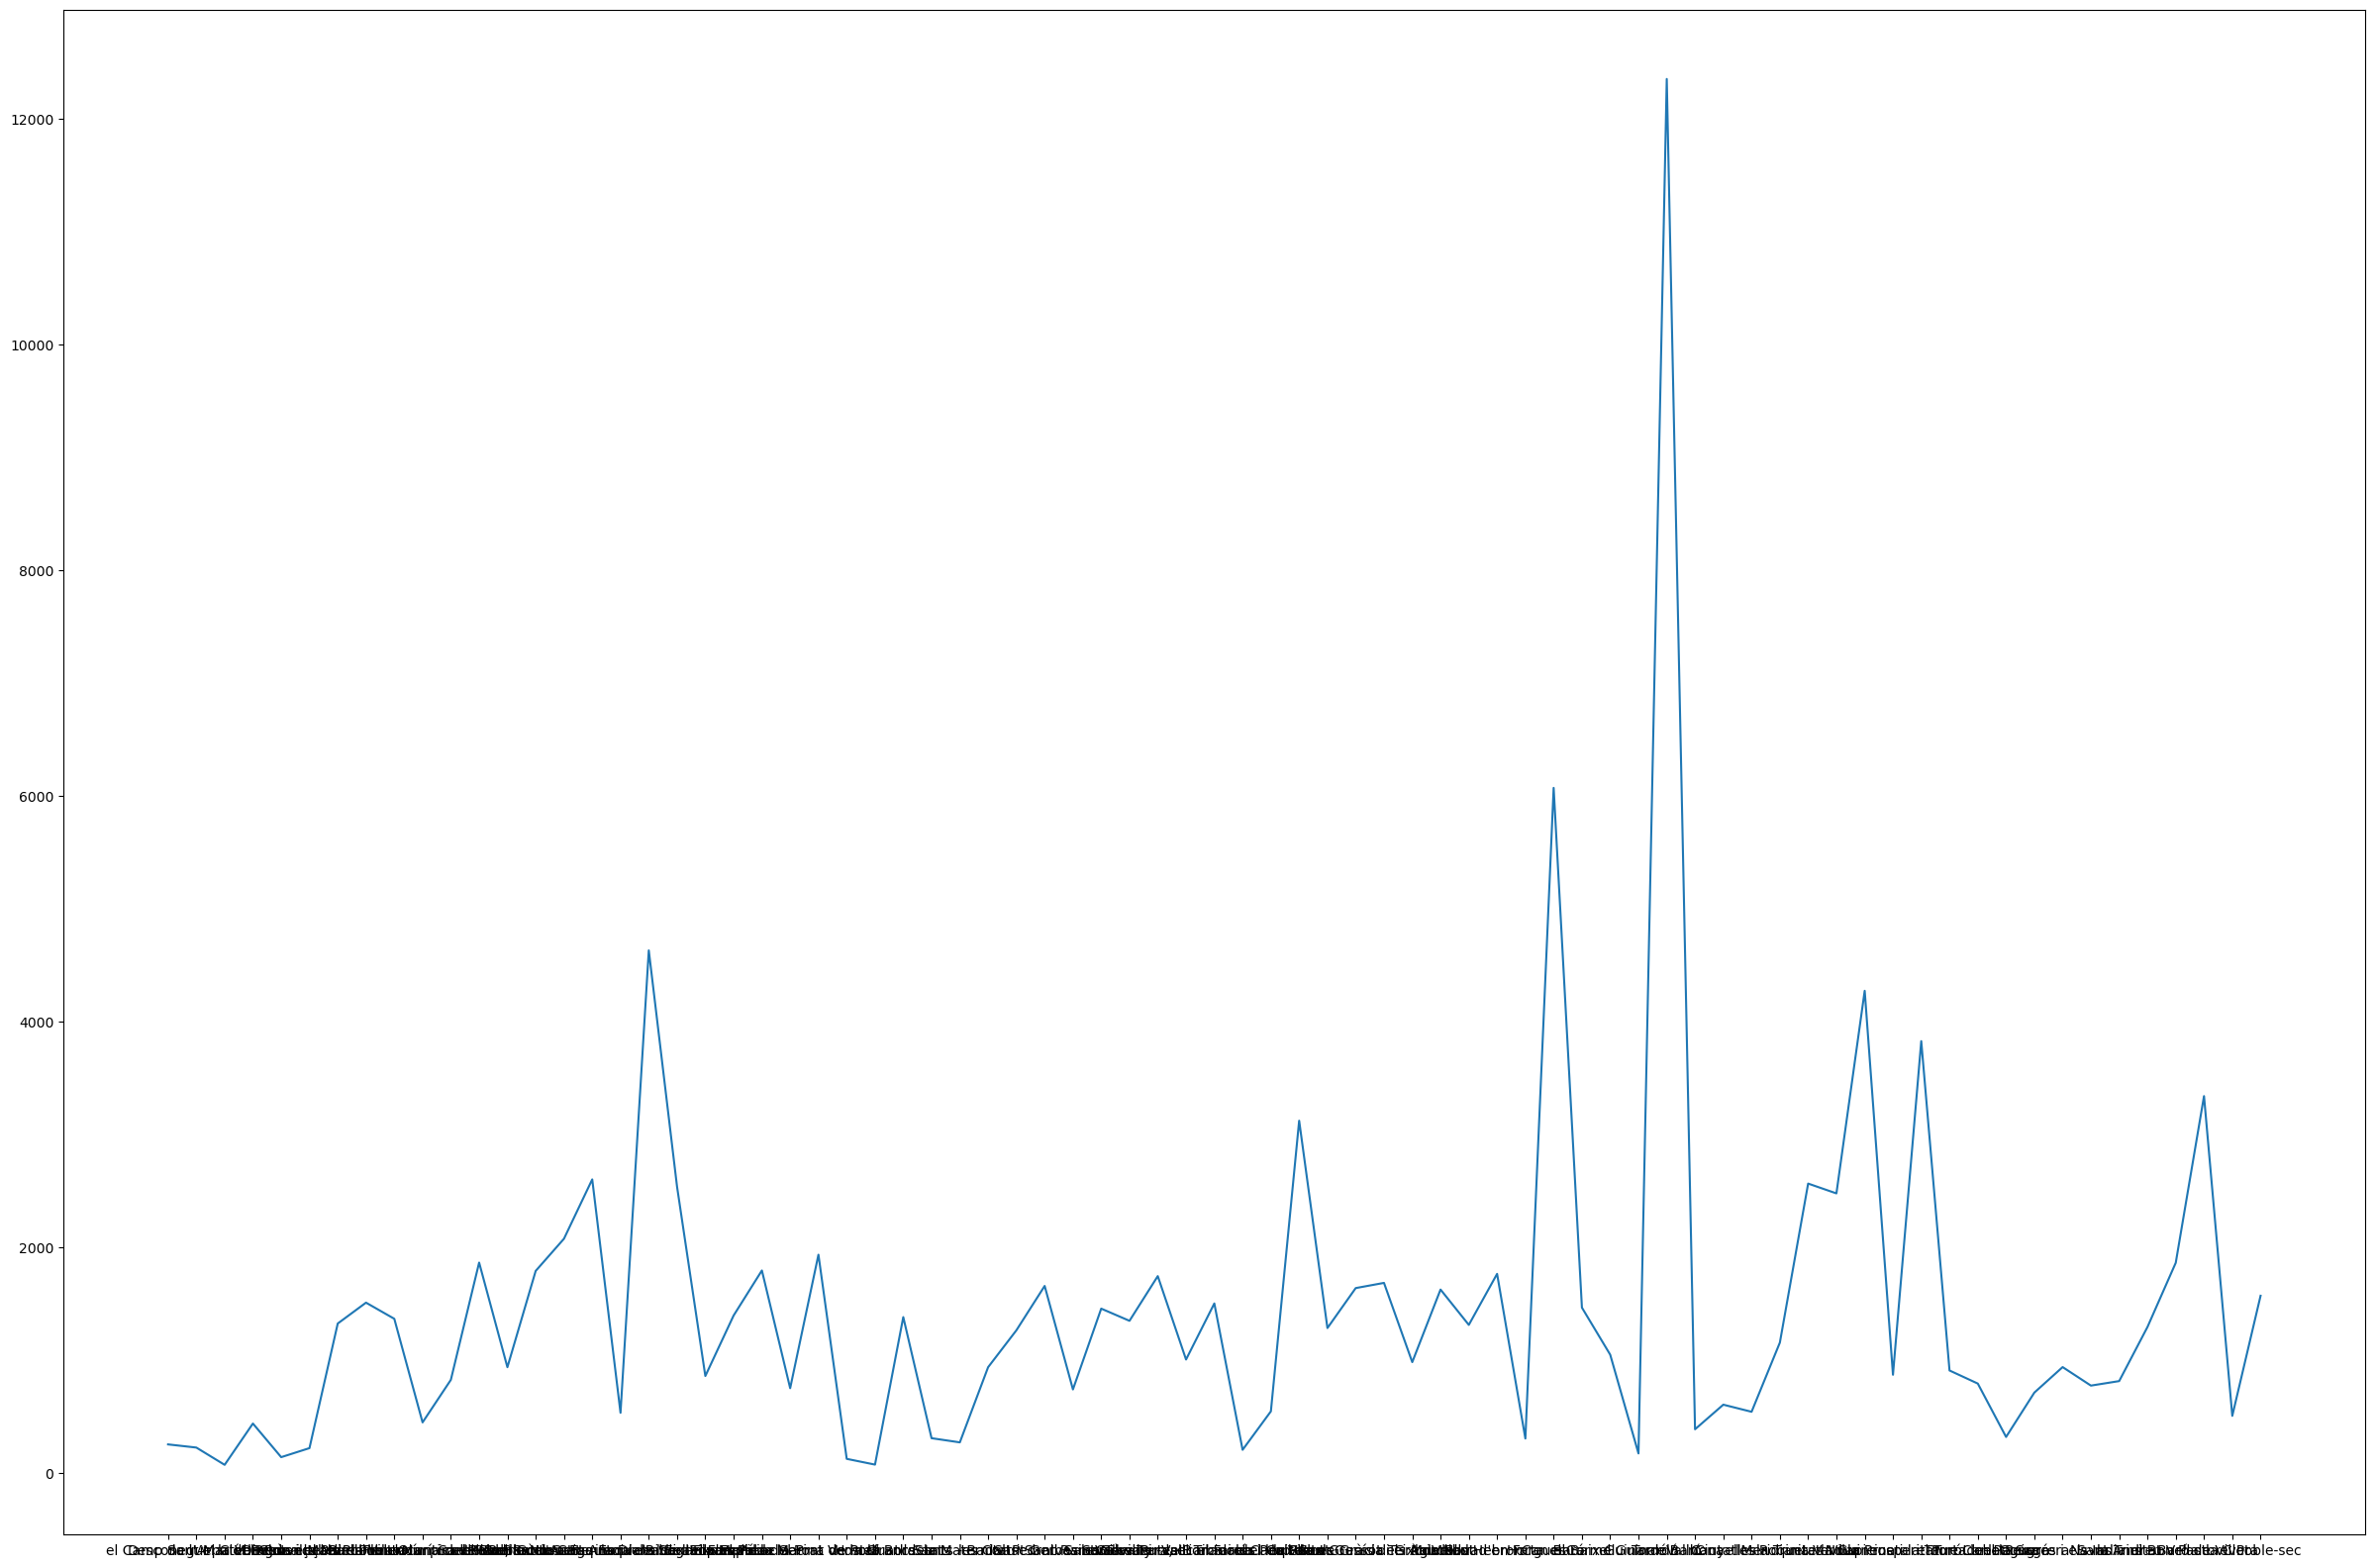

In [129]:
plt.figure(figsize = (30, 20))
neighbour = df5.groupby('neighborhood_name')['case_id'].count()
plt.plot(df5['neighborhood_name'].unique(), neighbour)
plt.show

In [135]:
#we dont need weekday_name cos we have weekday,case_id street_name month_name, neighbourhood_name, district_name we have numeric alternate for them all.
#Check for outliers - scatterplot
#When all are numeric - corr() 
#then model

In [137]:
df5.columns

Index(['case_id', 'district_id', 'district_name', 'neighborhood_id',
       'neighborhood_name', 'street_code', 'street_name', 'weekday_name',
       'weekday', 'year', 'month', 'month_name', 'day', 'hour', 'cyrcadian',
       'cause_incident', 'n_deaths', 'n_wounded_mild', 'n_wounded_severe',
       'n_victims', 'n_vehicles', 'utm_coordinate_y', 'utm_coordinate_x',
       'working'],
      dtype='object')

In [140]:
df6 = df5.drop(['weekday_name', 'district_name', 'neighborhood_name', 'street_name', 'month_name', 'case_id'], axis = 1)

In [141]:
df6.columns

Index(['district_id', 'neighborhood_id', 'street_code', 'weekday', 'year',
       'month', 'day', 'hour', 'cyrcadian', 'cause_incident', 'n_deaths',
       'n_wounded_mild', 'n_wounded_severe', 'n_victims', 'n_vehicles',
       'utm_coordinate_y', 'utm_coordinate_x', 'working'],
      dtype='object')

In [142]:
df6.dtypes

district_id         float64
neighborhood_id      object
street_code         float64
weekday              object
year                 object
month                object
day                  object
hour                  int32
cyrcadian            object
cause_incident       object
n_deaths            float64
n_wounded_mild      float64
n_wounded_severe    float64
n_victims           float64
n_vehicles          float64
utm_coordinate_y     object
utm_coordinate_x     object
working               int64
dtype: object

In [172]:
df6.neighborhood_id.unique() 

array(['-1.0', '64.0', '65.0', '72.0', '73.0', '70.0', '71.0', '68.0',
       '69.0', '66.0', '67.0', '1.0', '2.0', '3.0', '4.0', '10.0', '9.0',
       '8.0', '7.0', '6.0', '5.0', '11.0', '12.0', '13.0', '14.0', '15.0',
       '16.0', '18.0', '17.0', '19.0', '20.0', '21.0', '26.0', '23.0',
       '24.0', '25.0', '27.0', '22.0', '28.0', '29.0', '30.0', '31.0',
       '32.0', '39.0', '38.0', '40.0', '41.0', '36.0', '43.0', '34.0',
       '37.0', '33.0', '35.0', '54.0', '56.0', '49.0', '55.0', '50.0',
       '53.0', '51.0', '48.0', '52.0', '44.0', '45.0', '46.0', '47.0',
       '61.0', '62.0', '63.0', '60.0', '57.0', '59.0', '58.0', '42.0',
       '-1', '64', '65', '72', '70', '73', '71', '68', '69', '66', '1',
       '67', '2', '4', '3', '10', '9', '8', '7', '6', '5', '11', '12',
       '13', '15', '16', '14', '17', '18', '19', '20', '21', '26', '23',
       '24', '25', '27', '22', '28', '31', '30', '29', '32', '38', '39',
       '36', '41', '40', '43', '34', '37', '35', '33', '49', '50'

In [190]:
df6.weekday

0         2
1         2
2         6
3         5
4         5
         ..
110650    2
110651    2
110652    2
110653    2
110654    3
Name: weekday, Length: 110653, dtype: object

In [191]:
def conver_dtype(df, conversion):
        df = df.astype(conversion)
        return df

In [194]:
col = {'day': float, 'month': float, 'year': float, 'weekday': float}
df7 = df6.copy()
df7 = conver_dtype(df7, col)
df7.dtypes

district_id         float64
neighborhood_id      object
street_code         float64
weekday             float64
year                float64
month               float64
day                 float64
hour                  int32
cyrcadian            object
cause_incident       object
n_deaths            float64
n_wounded_mild      float64
n_wounded_severe    float64
n_victims           float64
n_vehicles          float64
utm_coordinate_y     object
utm_coordinate_x     object
working               int64
dtype: object

In [195]:
df7.utm_coordinate_y 

0                 -1
1         4585420,58
2         4585555,86
3         4585565,44
4         4585260,16
             ...    
110650    4582580,73
110651    4585401,31
110652    4583086,37
110653    4582172,65
110654    4584121,58
Name: utm_coordinate_y, Length: 110653, dtype: object

In [196]:
df7.utm_coordinate_y.dtype 

dtype('O')

In [197]:
df7 = df7.drop(0, axis = 0)
df7.utm_coordinate_y 

1         4585420,58
2         4585555,86
3         4585565,44
4         4585260,16
5         4585174,30
             ...    
110650    4582580,73
110651    4585401,31
110652    4583086,37
110653    4582172,65
110654    4584121,58
Name: utm_coordinate_y, Length: 110652, dtype: object

In [198]:
df7['utm_coordinate_y'].replace(to_replace = ',',value = '.', regex = True, inplace= True)
df7['utm_coordinate_x'].replace(to_replace = ',',value = '.', regex = True, inplace= True)
df7.utm_coordinate_y 

1         4585420.58
2         4585555.86
3         4585565.44
4         4585260.16
5         4585174.30
             ...    
110650    4582580.73
110651    4585401.31
110652    4583086.37
110653    4582172.65
110654    4584121.58
Name: utm_coordinate_y, Length: 110652, dtype: object

In [217]:
col = {'utm_coordinate_y' : float, 'utm_coordinate_x': float}
df8 = conver_dtype(df7, col)
df8.dtypes

district_id         float64
neighborhood_id      object
street_code         float64
weekday             float64
year                float64
month               float64
day                 float64
hour                  int32
cyrcadian            object
cause_incident       object
n_deaths            float64
n_wounded_mild      float64
n_wounded_severe    float64
n_victims           float64
n_vehicles          float64
utm_coordinate_y    float64
utm_coordinate_x    float64
working               int64
dtype: object

In [218]:
df8.cyrcadian.unique()

array(['Afternoon', 'morning', 'Nit'], dtype=object)

Lets replace it with 0,1,2 for Morning, afternoon and night

In [223]:
df8.loc[df8['cyrcadian'] == 'Afternoon', 'cyrcadian'] = 1 
df8.loc[df8['cyrcadian'] == 'morning', 'cyrcadian'] = 0
df8.loc[df8['cyrcadian'] == 'Nit', 'cyrcadian'] = 2 

In [224]:
df8.cyrcadian.unique()

array([1, 0, 2], dtype=object)

#one hot incoding cause of incident

In [226]:
dummies = pd.get_dummies(df8.cause_incident)
dummies.head()

,Cross over the pedestrian crossing,Disobey other signals,Disobey the traffic light signal,It is not the cause of the pedestrian,Walk along the road,others,unknown
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
5,0,0,1,0,0,0,0


In [229]:
#To avoid dummy variable trap
#Since removing a column, we would still be able to represent it with zeros in all other columns
df9 = pd.concat([df8, dummies.drop('unknown', axis = 1)], axis = 1)
df9.head()

,district_id,neighborhood_id,street_code,weekday,year,month,day,hour,cyrcadian,cause_incident,...,n_vehicles,utm_coordinate_y,utm_coordinate_x,working,Cross over the pedestrian crossing,Disobey other signals,Disobey the traffic light signal,It is not the cause of the pedestrian,Walk along the road,others
1,10.0,64.0,134801.0,2.0,2015.0,10.0,13.0,19,1,Disobey the traffic light signal,...,1.0,4585420.58,431779.16,0,0,0,1,0,0,0
2,10.0,64.0,161407.0,6.0,2015.0,2.0,21.0,21,1,It is not the cause of the pedestrian,...,1.0,4585555.86,431913.65,0,0,0,0,1,0,0
3,10.0,64.0,226400.0,5.0,2015.0,6.0,5.0,9,0,It is not the cause of the pedestrian,...,2.0,4585565.44,431946.45,0,0,0,0,1,0,0
4,10.0,64.0,95506.0,5.0,2015.0,7.0,17.0,20,1,It is not the cause of the pedestrian,...,1.0,4585260.16,431530.84,0,0,0,0,1,0,0
5,10.0,64.0,194406.0,2.0,2015.0,3.0,17.0,12,0,Disobey the traffic light signal,...,1.0,4585174.30,431648.74,0,0,0,1,0,0,0


In [230]:
df10 = df9.drop('cause_incident', axis = 1)
df10.columns

Index(['district_id', 'neighborhood_id', 'street_code', 'weekday', 'year',
       'month', 'day', 'hour', 'cyrcadian', 'n_deaths', 'n_wounded_mild',
       'n_wounded_severe', 'n_victims', 'n_vehicles', 'utm_coordinate_y',
       'utm_coordinate_x', 'working', 'Cross over the pedestrian crossing',
       'Disobey other signals', 'Disobey the traffic light signal',
       'It is not the cause of the pedestrian', 'Walk along the road',
       'others'],
      dtype='object')

Feature Engineering: Make a Y which will be a binary, dependent variable - ambulance called. Using both death >0 or wounded severe > 0. 